# This notebook shows the experiments related to ATAC-seq on the brains of synthetic enhancer integrated fly lines.
#### Processed ATAC-seq data is in ./data/atac folder.
#### It consist of:
* Reading ATAC-seq files and calculating the coverage on the enhancers
#### Figures are saved to ./figures/atac folder

### General imports


In [1]:
import sys  
import os
import pickle
import utils
import numpy as np
import scipy
import tensorflow as tf
tf.disable_eager_execution()
tf.logging.set_verbosity(tf.logging.ERROR)

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use("default")
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

### Loading the ATAC-seq bigwig files and calculating the coverage on integrated synthetic sequences

In [2]:
import pyBigWig
bw_dict = {}
for id_ in ["EFS-1","EFS-2","EFS-3","EFS-4","EFS-5","EFS-6"]:
    bw_dict[id_] = pyBigWig.open("data/atac/OmniATAC_KC_"+id_+".bwa.out.fixmate.possorted.dedup.noblacklist.RPGCnormalized.bw")

### Calculating the ATAC-seq coverage on genomic enhancers

In [3]:
atac_values = {}
for id_ in ["EFS-1","EFS-2","EFS-3","EFS-4","EFS-5","EFS-6"]:
    atac_values[id_] = bw_dict[id_].values("chr2L", 1144903, 1145400)

gish_atac_values = {}
for id_ in ["EFS-1","EFS-2","EFS-3","EFS-4","EFS-5","EFS-6"]:
    gish_atac_values[id_] = bw_dict[id_].values("chr3R", 16286180, 16286811)

Appl_atac_values = {}
for id_ in ["EFS-1","EFS-2","EFS-3","EFS-4","EFS-5","EFS-6"]:
    Appl_atac_values[id_] = bw_dict[id_].values("chrX", 534839, 535834)

### Plotting the ATAC-seq coverage on both integrated synthetic sequences and genomic enhancers

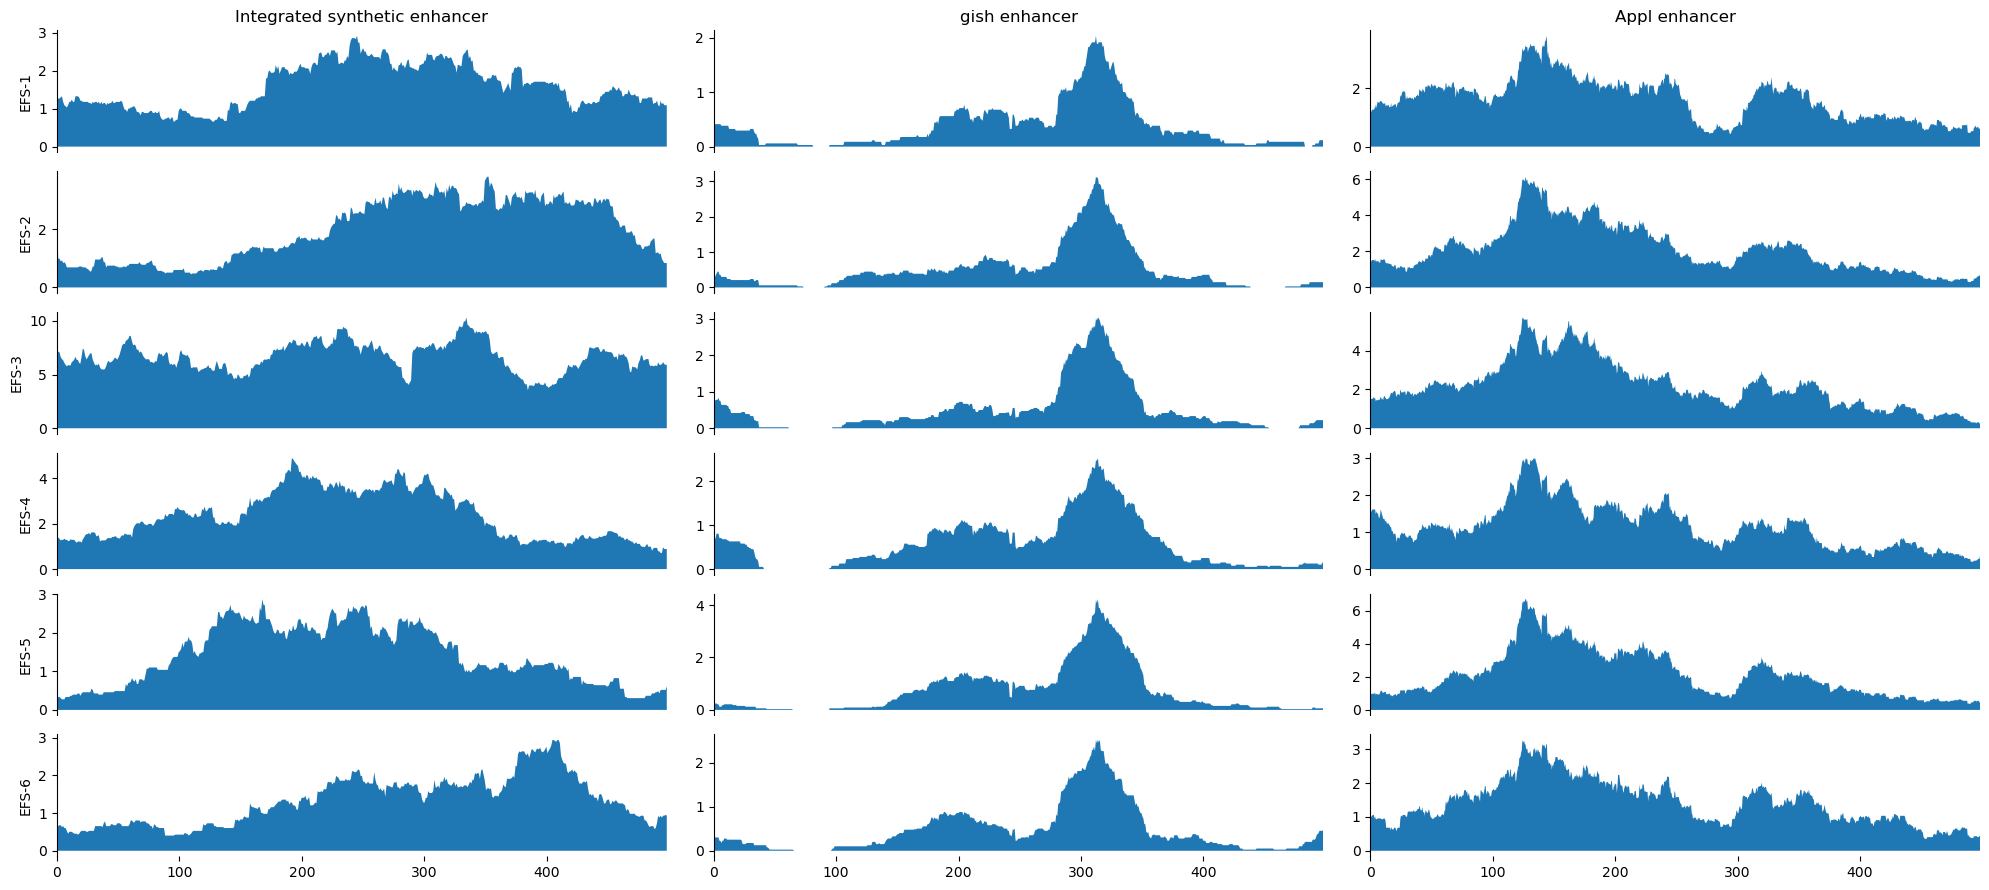

In [4]:
import seaborn as sns

n_tracks = 6
fig = plt.figure(figsize=(20,1.5*n_tracks))

for i,id_ in enumerate(["EFS-1","EFS-2","EFS-3","EFS-4","EFS-5","EFS-6"]):
    ax  = fig.add_subplot(n_tracks,3,i*3+1)
    ax.fill_between(np.linspace(0, 498, num=len(atac_values[id_])),0,atac_values[id_]) 
    if i==0:
        ax.set_title("Integrated synthetic enhancer")
    ax.margins(x=0)
    ax.set_ylabel(id_)
    if i!=5:
        ax.set_xticks([])
    #ax.set_ylim([0,100])

    ax  = fig.add_subplot(n_tracks,3,i*3+2)
    ax.fill_between(np.linspace(0, 498, num=len(gish_atac_values[id_])),0,gish_atac_values[id_]) 
    if i==0:
        ax.set_title("gish enhancer")
    ax.margins(x=0)
    if i!=5:
        ax.set_xticks([])
    #ax.set_ylim([0,100])

    ax  = fig.add_subplot(n_tracks,3,i*3+3)
    ax.fill_between(np.linspace(0, 498, num=len(Appl_atac_values[id_])),0,Appl_atac_values[id_]) 
    if i==0:
        ax.set_title("Appl enhancer")
    ax.margins(x=0)
    if i!=5:
        ax.set_xticks([])
    #ax.set_ylim([0,100])
    
sns.despine(top=True, right=True, bottom=True)
fig.tight_layout()
plt.savefig("figures/atac/accessiblity_EFS1_2_3_4_5_6_enhancer_gish_appl.pdf",transparent=True,dpi=300)
